# Project Description
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 


# Independent Variables
1.	months_as_customer: Number of months of patronage
2.	age: the length of time a customer has lived or a thing has existed
3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
6.	policy_csl: is basically Combined Single Limit
7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
10.	insured_zip: It is the zip code where the insurance was made
11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
12.	insured_education_level: This refers to the Level of education of the customer
13.	insured_occupation: This refers Occupation of the customer
14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
16.	capital-gains: This refers to profit accrued due to insurance premium
17.	capital-loss: This refers to the losses incurred due to insurance claims
18.	incident_date: This refers to the date which claims where made by customers
19.	incident_type: This refers to the type of claim/vehicle damage made by customer
20.	collision_type: This refers to the area of damage on the vehicle
21.	incident_severity: This refers to the extent/level of damage
22.	authorities_contacted: This refers to the government agencies that were contacted after damage
23.	incident_state: This refers to the state at which the accident happened
24.	incident_city: This refers to the city at which the accident happened
25.	1ncident_location: This refers to the location at which the accident happened
26.	incident_hour_of_the_day: The period of the day which accident took place
27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident
28.	property_damage: This refers to whether property was damaged or not
29.	bodily_injuries: This refers to injuries sustained
30.	witnesses: This refers to the number of witnesses involved
31.	police_report_available: This refers to whether the report on damage was documented or not
32.	total_claim_amount: This refers to the financial implications involved in claims
33.	injury_claim: This refers to physical injuries sustained
34.	property_claim: This refers to property damages during incident
35.	vehicle_claim: This refers to property damages during incident
36.	auto_make: This refers to the make of the vehicle
37.	auto_model: This refers to the model of the vehicle
38.	auto_year: This refers to the year which the vehicle was manufactured
39.	_c39:
40.	fraud_reported


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# 
Classification promblem

In [3]:
df.shape

(1000, 40)

#  There is 1000 rows and 40 columns present in the dataset

In [4]:
df.duplicated().sum()

0

# There is no duplicate value present in the dataset

In [5]:
for i in df.columns:
    print(df[i].value_counts())

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
OH   

# 
Above the information we can obversed police_report_available column has found a symbol ('?') and we take it as a null values
policy number is unique value to each customer and not contribute to build a model so we drop this column
and we noticed there is data imbalance present in the dataset

In [6]:
for column in df.columns:
    df[column] = df[column].replace('?', np.nan)

In [7]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

# 
As per the above information we can see _c39 column has found missig values so it's better we drop this column 

In [8]:
df.drop(columns=['policy_number','_c39'],axis=1,inplace=True)

In [9]:
catgorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        catgorical_col.append(i)
        
numerical_col=[]
for i in df.dtypes.index:
     if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
        numerical_col.append(i)

        
datetime_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='datetime64[ns]':
        datetime_col.append(i)

In [10]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy='most_frequent') 
for i in catgorical_col:
    column_data = df[i].values.reshape(-1, 1)
    df[i]=imputer.fit_transform(column_data)

In [11]:
df.isna().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

#  As we  observed policy_bind_date dtype is object dtype we have to change dtype

In [13]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['policy_bind_date']

0     2014-10-17
1     2006-06-27
2     2000-06-09
3     1990-05-25
4     2014-06-06
         ...    
995   1991-07-16
996   2014-05-01
997   2003-02-17
998   2011-11-18
999   1996-11-11
Name: policy_bind_date, Length: 1000, dtype: datetime64[ns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_bind_date             1000 non-null   datetime64[ns]
 3   policy_state                 1000 non-null   object        
 4   policy_csl                   1000 non-null   object        
 5   policy_deductable            1000 non-null   int64         
 6   policy_annual_premium        1000 non-null   float64       
 7   umbrella_limit               1000 non-null   int64         
 8   insured_zip                  1000 non-null   int64         
 9   insured_sex                  1000 non-null   object        
 10  insured_education_level      1000 non-null   object        
 11  insured_occupation           1000 non-null  

# 
Using this code seprate the dtypes for using future purposes

In [15]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


# 
Based on the provided summary statistics, here is an overview of each column in the dataset:

months_as_customer:

Count: 1000
Mean: 203.954000
Standard Deviation (std): 115.113174
Minimum (min): 0.000000
25th Percentile (25%): 115.750000
Median (50%): 199.500000
75th Percentile (75%): 276.250000
Maximum (max): 479.000000

age:

Count: 1000
Mean: 38.948000
Standard Deviation (std): 9.140287
Minimum (min): 19.000000
25th Percentile (25%): 32.000000
Median (50%): 38.000000
75th Percentile (75%): 44.000000
Maximum (max): 64.000000

policy_number:

Count: 1000
Mean: 546238.648000
Standard Deviation (std): 257063.005276
Minimum (min): 100804.000000
25th Percentile (25%): 335980.250000
Median (50%): 533135.000000
75th Percentile (75%): 759099.750000
Maximum (max): 999435.000000

policy_deductable:

Count: 1000
Mean: 1136.000000
Standard Deviation (std): 611.864673
Minimum (min): 500.000000
25th Percentile (25%): 500.000000
Median (50%): 1000.000000
75th Percentile (75%): 2000.000000
Maximum (max): 2000.000000

policy_annual_premium:

Count: 1000
Mean: 1256.406150
Standard Deviation (std): 244.167395
Minimum (min): 433.330000
25th Percentile (25%): 1089.607500
Median (50%): 1257.200000
75th Percentile (75%): 1415.695000
Maximum (max): 2047.590000

umbrella_limit:

Count: 1000
Mean: 1.101000e+06
Standard Deviation (std): 2.297407e+06
Minimum (min): -1.000000e+06
25th Percentile (25%): 0.000000e+00
Median (50%): 0.000000e+00
75th Percentile (75%): 0.000000e+00
Maximum (max): 1.000000e+07

insured_zip:

Count: 1000
Mean: 501214.488000
Standard Deviation (std): 71701.610941
Minimum (min): 430104.000000
25th Percentile (25%): 448404.500000
Median (50%): 466445.500000
75th Percentile (75%): 603251.000000
Maximum (max): 620962.000000

capital-gains:

Count: 1000
Mean: 25126.100000
Standard Deviation (std): 27872.187708
Minimum (min): 0.000000
25th Percentile (25%): 0.000000
Median (50%): 0.000000
75th Percentile (75%): 51025.000000
Maximum (max): 100500.000000

capital-loss:

Count: 1000
Mean: -26793.700000
Standard Deviation (std): 28104.096686
Minimum (min): -111100.000000
25th Percentile (25%): -51500.000000
Median (50%): -23250.000000
75th Percentile (75%): 0.000000
Maximum (max): 0.000000

incident_hour_of_the_day:

Count: 1000
Mean: 11.644000
Standard Deviation (std): 6.951373
Minimum (min): 0.000000
25th Percentile (25%): 6.000000
Median (50%): 12.000000
75th Percentile (75%): 17.000000
Maximum (max): 23.000000

... and so on for the rest of the columns. The statistics provide information about the central tendency, dispersion, and range of values for each numerical column in the dataset.

# EDA

Y    247
N    753
Name: fraud_reported, dtype: int64


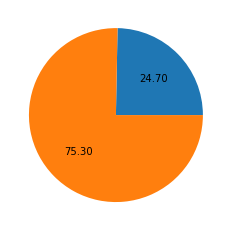

In [16]:
count_Type_of_glass=(df['fraud_reported'].value_counts().sort_values())
print(count_Type_of_glass)

plt.pie(x=count_Type_of_glass,autopct='%.2f',pctdistance=0.6, labeldistance=2)
plt.show()

<AxesSubplot:xlabel='months_as_customer', ylabel='Count'>

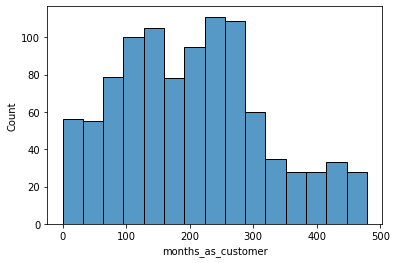

In [17]:
sns.histplot(x='months_as_customer',data=df)

# 
As we can see 0 to 5000 customer in a months in the dataset

<AxesSubplot:xlabel='age', ylabel='Count'>

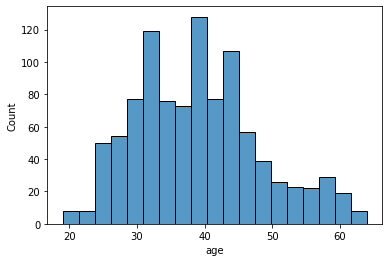

In [18]:
sns.histplot(x='age',data=df)

<AxesSubplot:xlabel='policy_state', ylabel='Count'>

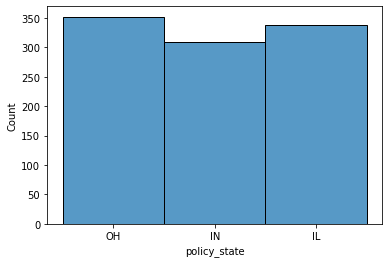

In [19]:
sns.histplot(x='policy_state',data=df)

<AxesSubplot:xlabel='policy_csl', ylabel='Count'>

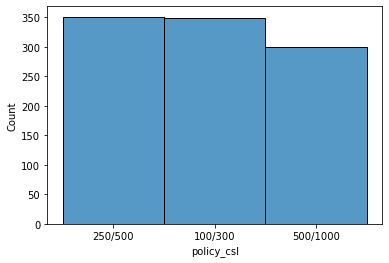

In [20]:
sns.histplot(x='policy_csl',data=df)

<AxesSubplot:xlabel='policy_deductable', ylabel='Count'>

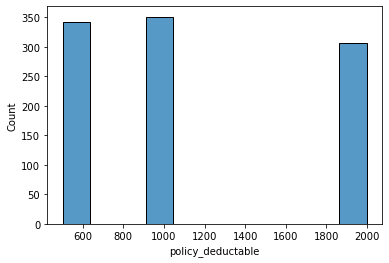

In [21]:
sns.histplot(x='policy_deductable',data=df)

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Count'>

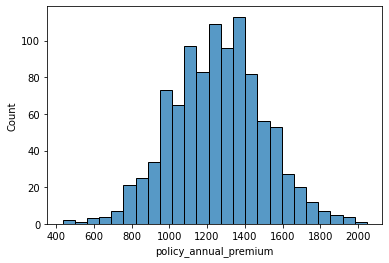

In [22]:
sns.histplot(x='policy_annual_premium',data=df)

<AxesSubplot:xlabel='umbrella_limit', ylabel='Count'>

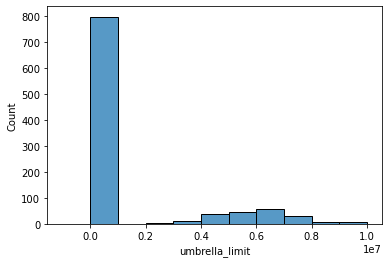

In [23]:
sns.histplot(x='umbrella_limit',data=df)

<AxesSubplot:xlabel='insured_zip', ylabel='Count'>

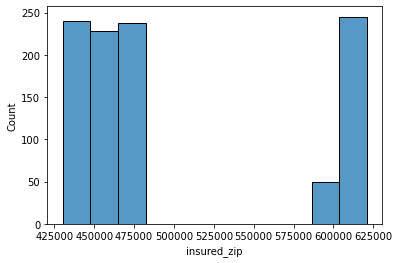

In [24]:
sns.histplot(x='insured_zip',data=df)

<AxesSubplot:xlabel='witnesses', ylabel='Count'>

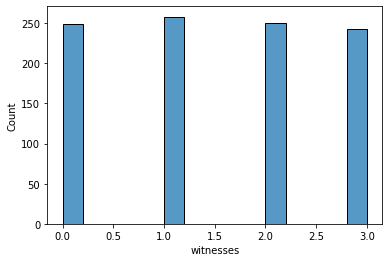

In [25]:
sns.histplot(x='witnesses',data=df)

NO     686
YES    314
Name: police_report_available, dtype: int64

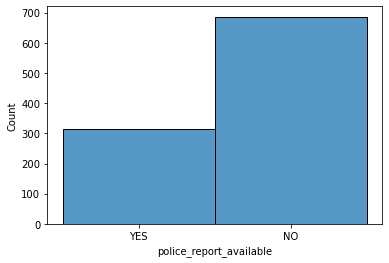

In [26]:
sns.histplot(x='police_report_available',data=df)
df['police_report_available'].value_counts()

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

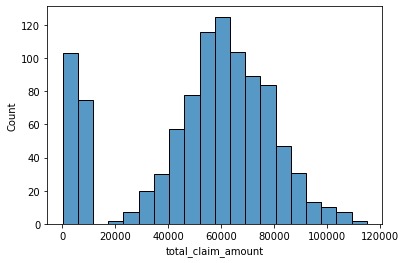

In [27]:
sns.histplot(x='total_claim_amount',data=df)

<AxesSubplot:xlabel='injury_claim', ylabel='Count'>

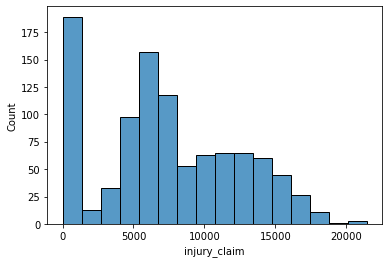

In [28]:
sns.histplot(x='injury_claim',data=df)

<AxesSubplot:xlabel='property_claim', ylabel='Count'>

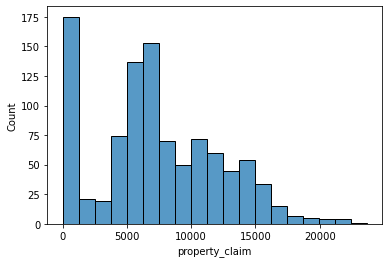

In [29]:
sns.histplot(x='property_claim',data=df)

<AxesSubplot:xlabel='vehicle_claim', ylabel='Count'>

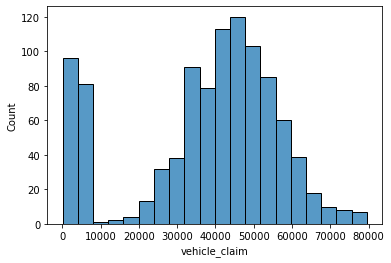

In [30]:
sns.histplot(x='vehicle_claim',data=df)

<AxesSubplot:xlabel='auto_make', ylabel='Count'>

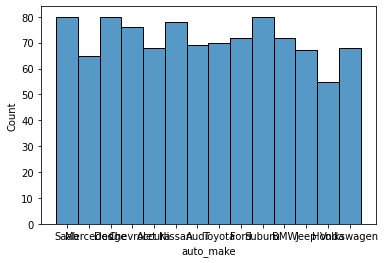

In [31]:
sns.histplot(x='auto_make',data=df)

<AxesSubplot:xlabel='auto_year', ylabel='Count'>

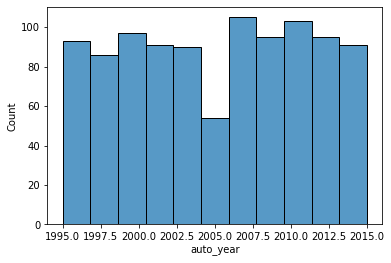

In [32]:
sns.histplot(x='auto_year',data=df)

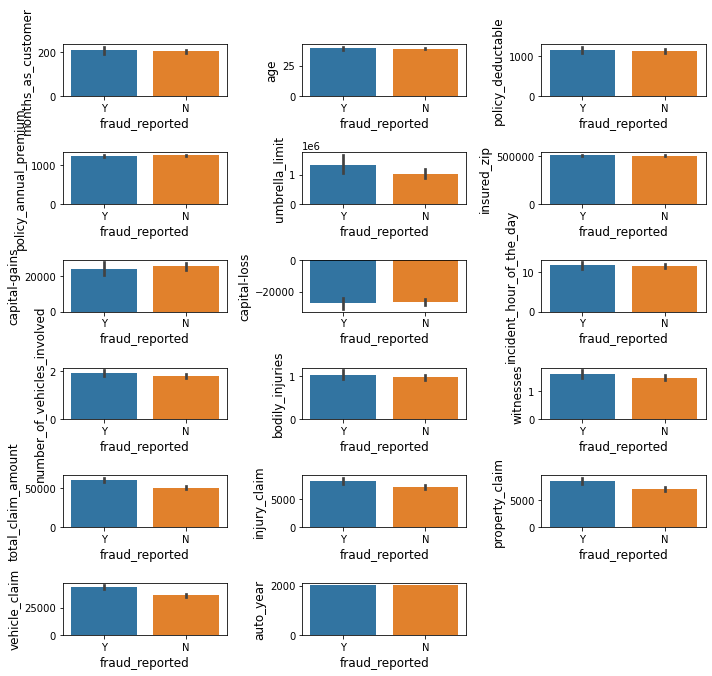

In [33]:
plt.figure(figsize=(10, 10))
plotnumber = 1

for column in numerical_col:
    if plotnumber <= 30:
        ax = plt.subplot(7, 3, plotnumber)
        sns.barplot(x='fraud_reported', y=column, data=df)
        plt.xlabel('fraud_reported', fontsize=12)
        plt.ylabel(column, fontsize=12)
    plotnumber += 1

plt.tight_layout()
plt.show()

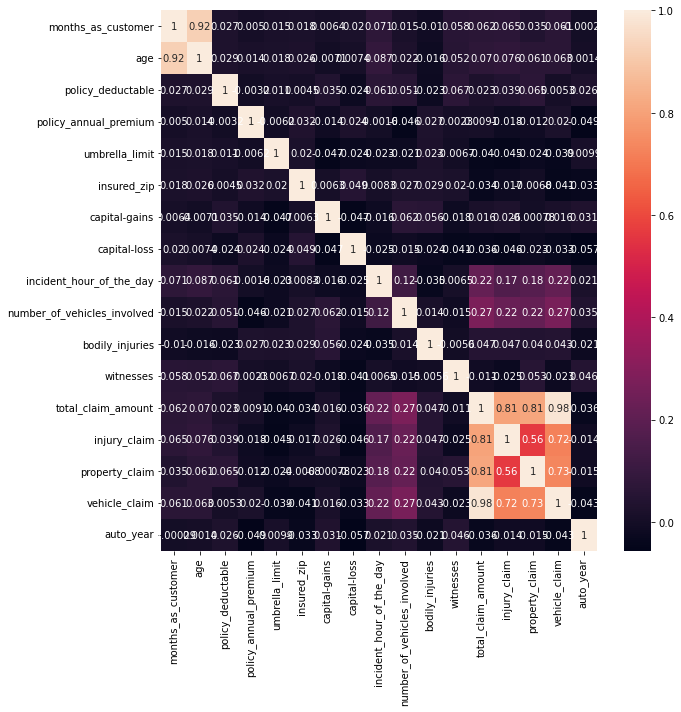

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.2g')
plt.tight_layout()
            

# 
As we can see age has a strong corelation with months_as-customer and total claim amount has a corelation with injury claim,
property claim, vehicle claim 

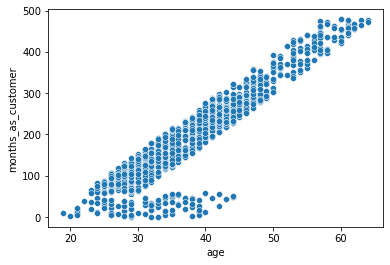

In [35]:
sns.scatterplot(x='age',y='months_as_customer',data=df)
plt.show()

# 
We can see age has a strong corelation with month_as_customer 

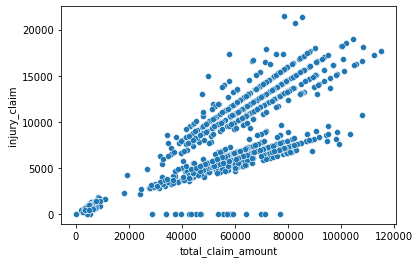

In [36]:
sns.scatterplot(x='total_claim_amount',y='injury_claim',data=df)
plt.show()

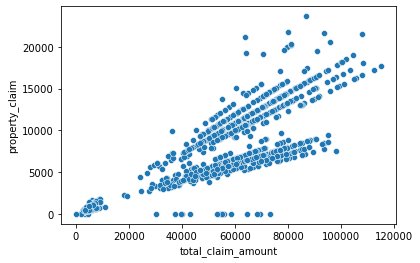

In [37]:
sns.scatterplot(x='total_claim_amount',y='property_claim',data=df)
plt.show()

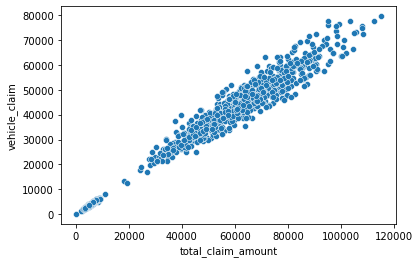

In [38]:
sns.scatterplot(x='total_claim_amount',y='vehicle_claim',data=df)
plt.show()

# 
As we can see total_claim_amount has strong Co-relation with vehicle_claim,property_claim,injury_claim so we drop this columns

In [39]:
df.drop(columns=['months_as_customer','vehicle_claim','property_claim','injury_claim'],inplace=True,axis=1)

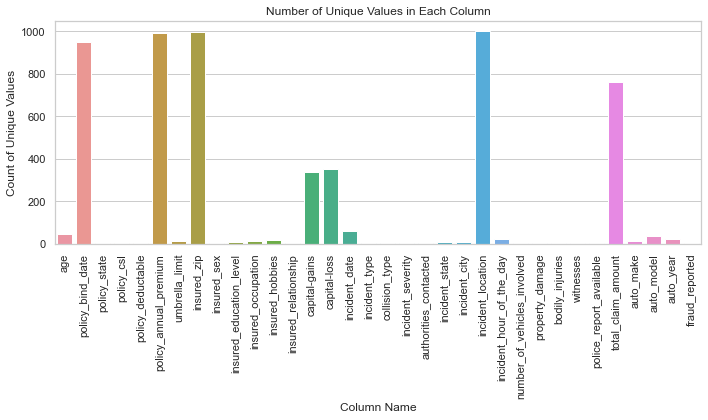

In [41]:
unique = df.nunique().to_frame()
unique.columns = ['Count']
unique.index.names = ['ColName']
unique = unique.reset_index()
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='ColName', y='Count', data=unique)
plt.xticks(rotation=90)
plt.xlabel('Column Name')
plt.ylabel('Count of Unique Values')
plt.title('Number of Unique Values in Each Column')
plt.tight_layout()
plt.show()

#
we need to drop unique value to more than 400 unique value

In [42]:
df.drop(columns=['policy_bind_date','policy_annual_premium','umbrella_limit','insured_zip','total_claim_amount','incident_location'],axis=1,inplace=True)

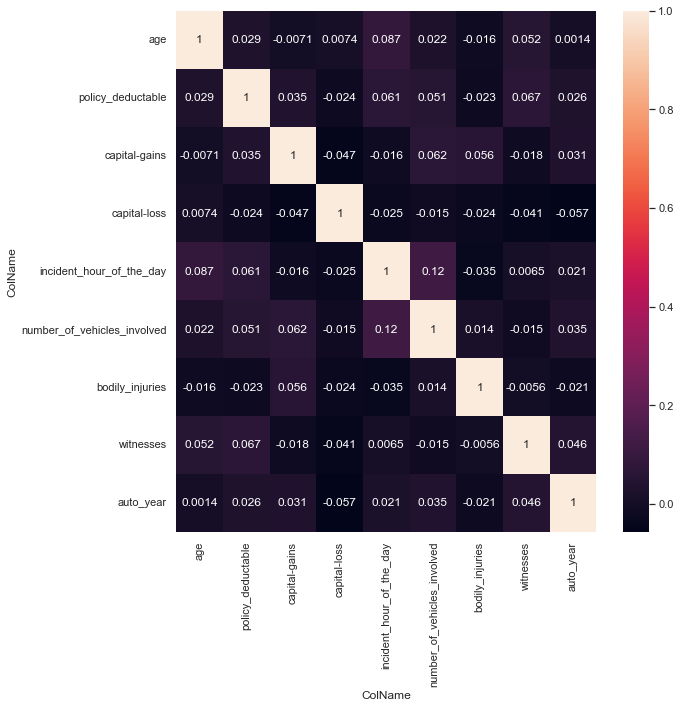

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.2g')
plt.tight_layout()
            

# 
Now we can see there is no co-relation with each others

In [44]:
catgorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        catgorical_col.append(i)
        
numerical_col=[]
for i in df.dtypes.index:
     if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
        numerical_col.append(i)

        
datetime_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='datetime64[ns]':
        datetime_col.append(i)

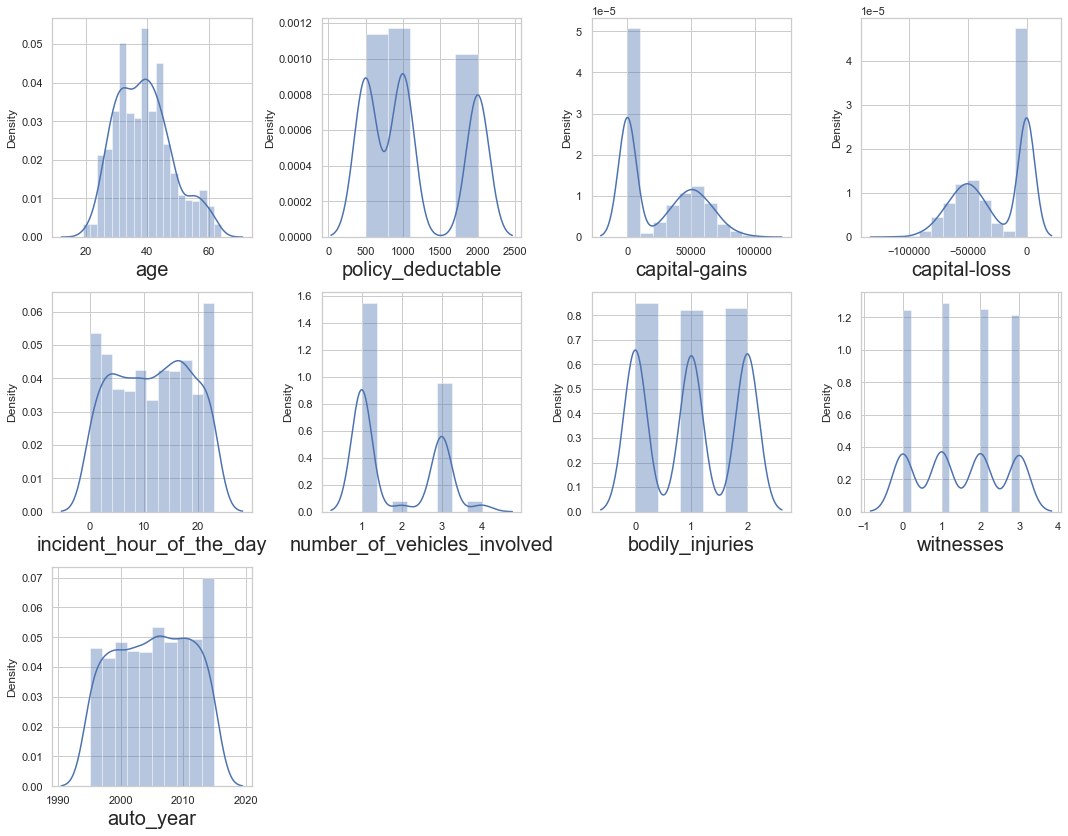

In [45]:
 plt.figure(figsize=(15,15))
plotnumber =1
for column in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.tight_layout()

# 
Above the distrubution plot we can see age and auto_year column is look like a normally distrubuted

capital-gains right skewness

capital-loss left skewness

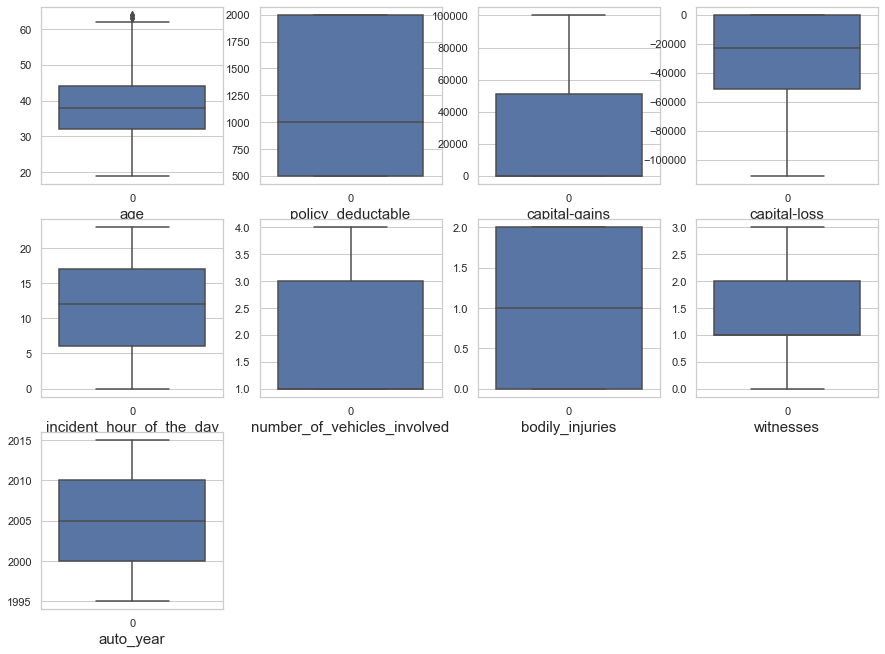

In [46]:
plt.figure(figsize=(15,15))
i=1
for column in numerical_col:
    if i<=12:
        
        
    
        plt.subplot(4,4,i)
    
        ax=sns.boxplot(data=df[column])
    
        plt.xlabel (column,fontsize=15)
        
    i+=1
    
plt.show()
    
                
                


# 
We can see there is no outliers present in the dataset

In [47]:
df.skew()

ColName
age                            0.478988
policy_deductable              0.477887
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
auto_year                     -0.048289
dtype: float64

# 
There is no skewness present in the dataset

#  Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder
lm=LabelEncoder()
for i in catgorical_col:
    df[i]=lm.fit_transform(df[i])

In [49]:
df.head()

ColName,age,policy_state,policy_csl,policy_deductable,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,auto_make,auto_model,auto_year,fraud_reported
0,48,2,1,1000,1,4,2,17,0,53300,...,5,1,1,1,2,1,10,1,2004,1
1,42,1,1,2000,1,4,6,15,2,0,...,8,1,0,0,0,0,8,12,2007,1
2,29,2,0,2000,0,6,11,2,3,35100,...,7,3,0,2,3,0,4,30,2007,0
3,41,0,1,2000,0,6,1,2,4,48900,...,5,1,0,1,2,0,3,34,2014,1
4,44,0,2,1000,1,0,11,2,4,66000,...,20,1,0,0,1,0,0,31,2009,0


In [50]:
x=df.drop(columns='fraud_reported',axis=1)
y=df['fraud_reported']

In [51]:
y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

# 
We can see there is data imbalance 

In [52]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [53]:
y.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

ColName,age,policy_state,policy_csl,policy_deductable,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,...,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,auto_make,auto_model,auto_year
0,1.036447,1.346347,0.244697,-0.256948,1.261778,0.621680,-1.179810,1.392618,-1.469880,1.030685,...,-0.937979,-0.970825,-0.824208,1.862483,0.130109,0.603304,1.827582,0.969916,-1.724413,-0.159303
1,0.350392,0.094743,0.244697,1.430619,1.261778,0.621680,-0.136938,1.023053,-0.191059,-0.896606,...,1.135557,-0.514311,-0.824208,-0.536918,-1.142257,-1.311502,-0.547171,0.444864,-0.671498,0.370299
2,-1.136060,1.346347,-1.052888,1.430619,-0.792533,1.697828,1.166653,-1.379122,0.448352,0.372585,...,-0.937979,-0.666483,1.270742,-0.536918,1.402475,1.560707,-0.547171,-0.605239,1.051452,0.370299
3,0.236050,-1.156861,0.244697,1.430619,-0.792533,1.697828,-1.440528,-1.379122,1.087762,0.871584,...,-1.456363,-0.970825,-0.824208,-0.536918,0.130109,0.603304,-0.547171,-0.867764,1.434330,1.606037
4,0.579077,-1.156861,1.542283,-0.256948,1.261778,-1.530618,1.166653,-1.379122,1.087762,1.489908,...,-1.456363,1.311746,-0.824208,-0.536918,-1.142257,-0.354099,-0.547171,-1.655342,1.147172,0.723367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,1.150789,1.346347,-1.052888,-0.256948,-0.792533,-1.530618,1.166653,-1.194339,-0.191059,-0.896606,...,0.617173,0.703060,-0.824208,-0.536918,0.130109,0.603304,-0.547171,-1.392816,-1.437254,-1.571574
1502,0.807762,0.094743,-1.052888,-0.256948,-0.792533,1.159754,0.384499,-1.379122,-0.191059,-0.896606,...,-0.419595,1.159574,-0.824208,-0.536918,-1.142257,-1.311502,-0.547171,-1.392816,-1.054376,0.017231
1503,1.722501,-1.156861,-1.052888,1.169046,1.261778,0.621680,0.123781,-0.824774,-0.191059,-0.896606,...,-0.419595,0.246546,-0.824208,-0.536918,1.402475,0.603304,-0.547171,-0.605239,1.051452,0.899901
1504,-0.793032,0.094743,-1.052888,-1.100732,1.261778,0.083605,1.166653,-1.009556,1.087762,-0.896606,...,0.098789,0.094375,-0.824208,-0.536918,0.130109,-1.311502,-0.547171,-0.867764,1.147172,0.017231


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x, i) for i in range(x.shape[1])]
vif ['features'] =x.columns 
vif

,vif,features
0,1.047881,age
1,1.047373,policy_state
2,1.054563,policy_csl
3,1.034802,policy_deductable
4,1.051068,insured_sex
5,1.043109,insured_education_level
6,1.017656,insured_occupation
7,1.055496,insured_hobbies
8,1.051254,insured_relationship
9,1.039317,capital-gains


#  all features column vif score is less than 5 so there is no co-relation with each others
# Preprocessing done now we can build a model

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRs = 0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    rnd = RandomForestClassifier()
    rnd.fit(x_train, y_train)
    y_pred = rnd.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i

print('Best accuracy is', maxAccu, 'at random_state', maxRs)


Best accuracy is 0.8982300884955752 at random_state 8


In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRs)

In [58]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report ,confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [59]:
LR= LogisticRegression()
LR.fit(x_train, y_train)
predLR= LR.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predLR)))
print('\n')
print(confusion_matrix(y_test, predLR))

Accuracy score 0.8053097345132744


[[189  60]
 [ 28 175]]


In [60]:
Rnd= RandomForestClassifier()
Rnd.fit(x_train, y_train)
predRnd= Rnd.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predRnd)))
print('\n')
print(confusion_matrix(y_test, predRnd))

Accuracy score 0.8938053097345132


[[222  27]
 [ 21 182]]


In [61]:
Etr= ExtraTreesClassifier()
Etr.fit(x_train, y_train)
predEtr= Etr.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predEtr)))
print('\n')
print(confusion_matrix(y_test, predEtr))

Accuracy score 0.8915929203539823


[[223  26]
 [ 23 180]]


In [62]:
svc=SVC()
svc.fit(x_train, y_train)
predsvc=svc.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predsvc)))
print('\n')

print(confusion_matrix(y_test, predsvc))

Accuracy score 0.8296460176991151


[[206  43]
 [ 34 169]]


In [63]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train, y_train)
predgbc =gbc.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predgbc)))
print('\n')

print(confusion_matrix(y_test, predgbc))

Accuracy score 0.8938053097345132


[[218  31]
 [ 17 186]]


In [64]:
adaboost= AdaBoostClassifier()
adaboost.fit(x_train, y_train)
predadaboost =adaboost.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predadaboost)))
print('\n')

print(confusion_matrix(y_test, predadaboost))

Accuracy score 0.8805309734513275


[[218  31]
 [ 23 180]]


In [65]:
bagging=BaggingClassifier()
bagging.fit(x_train, y_train)
predbagging =bagging.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predbagging)))
print('\n')

print(confusion_matrix(y_test, predbagging))

Accuracy score 0.8738938053097345


[[223  26]
 [ 31 172]]


#  Cross validation score

In [66]:
print('LogisticRegression ')
print('\n')
score=cross_val_score(LR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predLR)- score.mean())

LogisticRegression 


[0.65231788 0.73421927 0.82724252 0.85714286 0.84717608]
0.7836197223383425
Difference between Accuracy score  and cross validation score is -  0.021690012174931828


In [67]:
print('ExtraTreesClassifier ')
print('\n')
score=cross_val_score(Rnd, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predRnd)- score.mean())

ExtraTreesClassifier 


[0.73178808 0.81395349 0.89036545 0.9269103  0.91694352]
0.8559921673890564
Difference between Accuracy score  and cross validation score is -  0.03781314234545685


In [68]:
print('RandomForestClassifier ')
print('\n')
score=cross_val_score(Rnd, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predRnd)- score.mean())

RandomForestClassifier 


[0.71192053 0.80066445 0.89700997 0.93355482 0.92026578]
0.852683109282524
Difference between Accuracy score  and cross validation score is -  0.04112220045198922


In [69]:
print('SVC ')
print('\n')
score=cross_val_score(svc, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predsvc)- score.mean())

SVC 


[0.60927152 0.71760797 0.910299   0.910299   0.92358804]
0.8142131086224726
Difference between Accuracy score  and cross validation score is -  0.01543290907664241


In [70]:
print('GradientBoostingClassifier ')
print('\n')
score=cross_val_score(gbc, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predgbc)- score.mean())

GradientBoostingClassifier 


[0.73178808 0.81063123 0.87043189 0.92026578 0.910299  ]
0.8486831972893885
Difference between Accuracy score  and cross validation score is -  0.04512211244512476


In [71]:
print('AdaBoostClassifier ')
print('\n')
score=cross_val_score(adaboost, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predadaboost)- score.mean())

AdaBoostClassifier 


[0.69205298 0.77740864 0.88039867 0.89700997 0.89036545]
0.8274471408769883
Difference between Accuracy score  and cross validation score is -  0.05308383257433913


In [72]:
print('BaggingClassifier ')
print('\n')
score=cross_val_score(bagging, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predbagging)- score.mean())

BaggingClassifier 


[0.76490066 0.83388704 0.86046512 0.91362126 0.89700997]
0.853976810191195
Difference between Accuracy score  and cross validation score is -  0.019916995118539504


#  GradientBoostingClassifier is giving 89 per accuracy and 4 percent of cross validation score

In [73]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

gdsv = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)
gdsv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [74]:
gdsv.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 150}

In [82]:
Final_model= GradientBoostingClassifier(max_depth=5,min_samples_leaf=1,min_samples_split=10,n_estimators=150)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc= accuracy_score(y_test, pred)
print(acc*100)

91.5929203539823


In [83]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score


In [84]:
print(classification_report(y_test,y_pred))   # support means sample to x_test 

              precision    recall  f1-score   support

           0       0.52      0.47      0.49       249
           1       0.42      0.47      0.45       203

    accuracy                           0.47       452
   macro avg       0.47      0.47      0.47       452
weighted avg       0.48      0.47      0.47       452



In [85]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [86]:
print('threshold',threshold)
print('False possitive rate',fpr)
print('True possitive rate',tpr)

threshold [2 1 0]
False possitive rate [0.         0.53012048 1.        ]
True possitive rate [0.        0.4729064 1.       ]


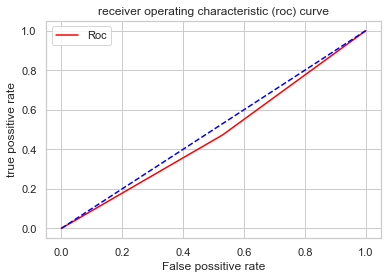

In [87]:
plt.plot(fpr,tpr, color='red', label='Roc')
plt.plot([0,1],[0,1], color='blue', linestyle='--')
plt.xlabel('False possitive rate')
plt.ylabel('true possitive rate')
plt.title('receiver operating characteristic (roc) curve')
plt.legend()
plt.show()

In [88]:
# how  much area auc curve covered
auc_score=roc_auc_score(y_test,y_pred)
auc_score

0.4713929610065879